In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
df= pd.read_csv("StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

#CHECKING MISSING VALUES HERE

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#CHECKING FOR DUPLICATES

In [10]:
df.duplicated().sum()

0

In [11]:
#CHECKING THE DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#CHECKING FOR STATISTICS OF DATASET

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#EXPLORING THE DATASET  


In [ ]:
print ("categories in 'gender' variable:      " ,end="  ")
print(df['gender'].unique())

print ("categories in 'race/ethnicity'variable:      " ,end="  ")
print(df['race/ethnicity'].unique())

print ("categories in 'parental level of education' variable:      " ,end="  ")
print(df['parental level of education'].unique())

print ("categories in 'lunch' variable:      " ,end="  ")
print(df['lunch'].unique())

print ("categories in 'test preparation courser' variable:      " ,end="  ")
print(df['test preparation course'].unique())

categories in 'gender' variable:        ['female' 'male']
categories in 'race/ethnicity'variable:        ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:        ['standard' 'free/reduced']
categories in 'test preparation courser' variable:        ['none' 'completed']


In [15]:
#define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype !='0']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='0']

print('We have {} numerical  features : {}'.format(len(numeric_features), numeric_features))
print('\nWe Have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical  features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

We Have 0 categorical features : []


In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



#ADDING COLUMNS FOR"TOTAL SCORE " AND "AVERAGE"

In [25]:
df['total score'] = df['math score']+ df['reading score']+ df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full= df[df['writing score']==100]['average'].count()
math_full= df[df['math score']==100]['average'].count()

print(f'Number of student woith marks in Maths :{math_full}')

print(f'Number of student woith marks in Reading :{reading_full}')

print(f'Number of student woith marks in writing :{writing_full}')

Number of student woith marks in Maths :7
Number of student woith marks in Reading :17
Number of student woith marks in writing :14


#HISTOGRAM

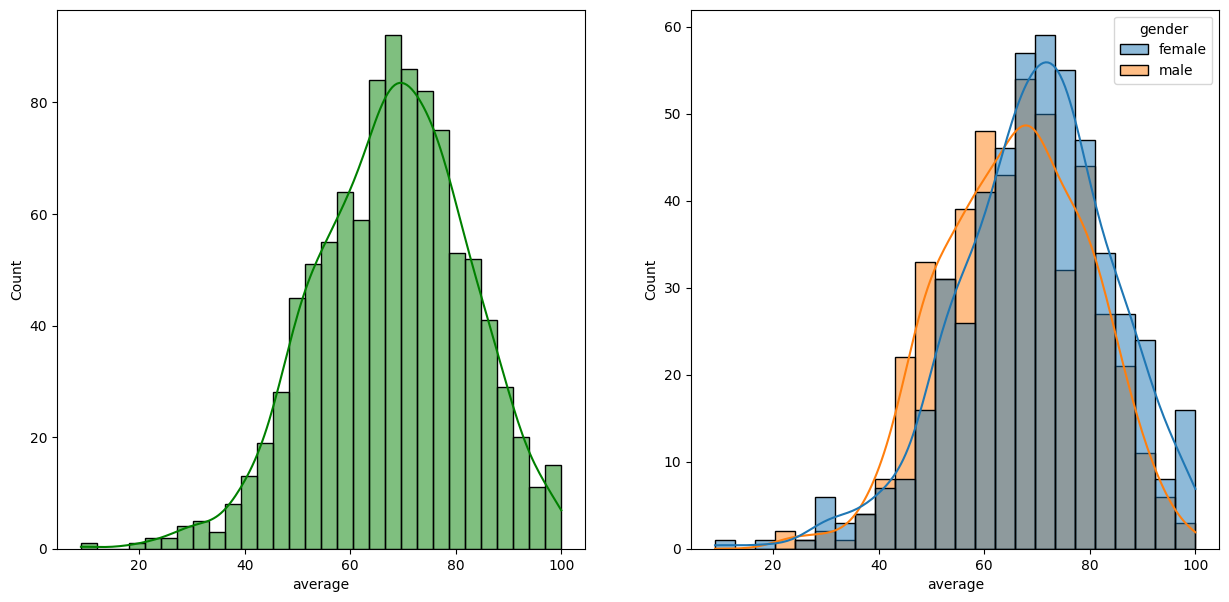

In [32]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins =30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


# CHECKING OUTLIERS

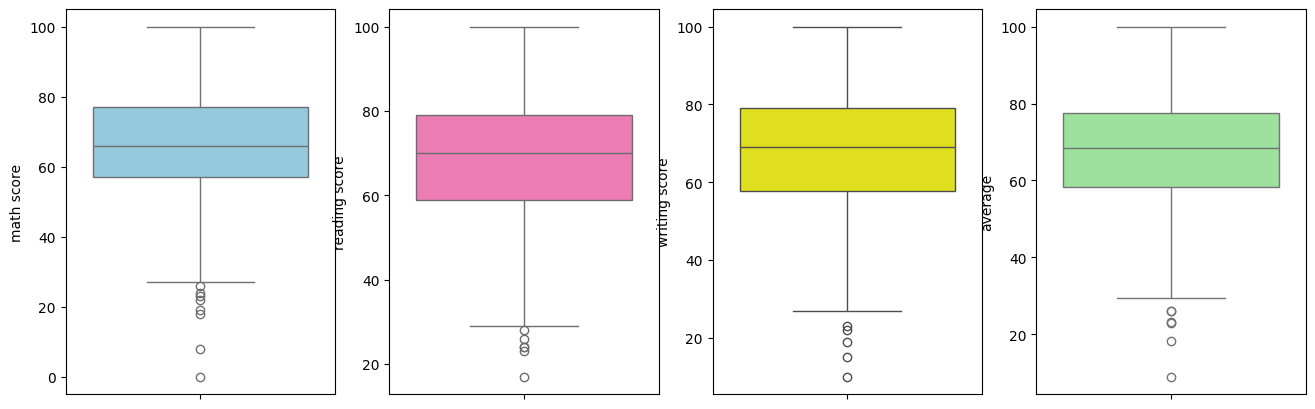

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

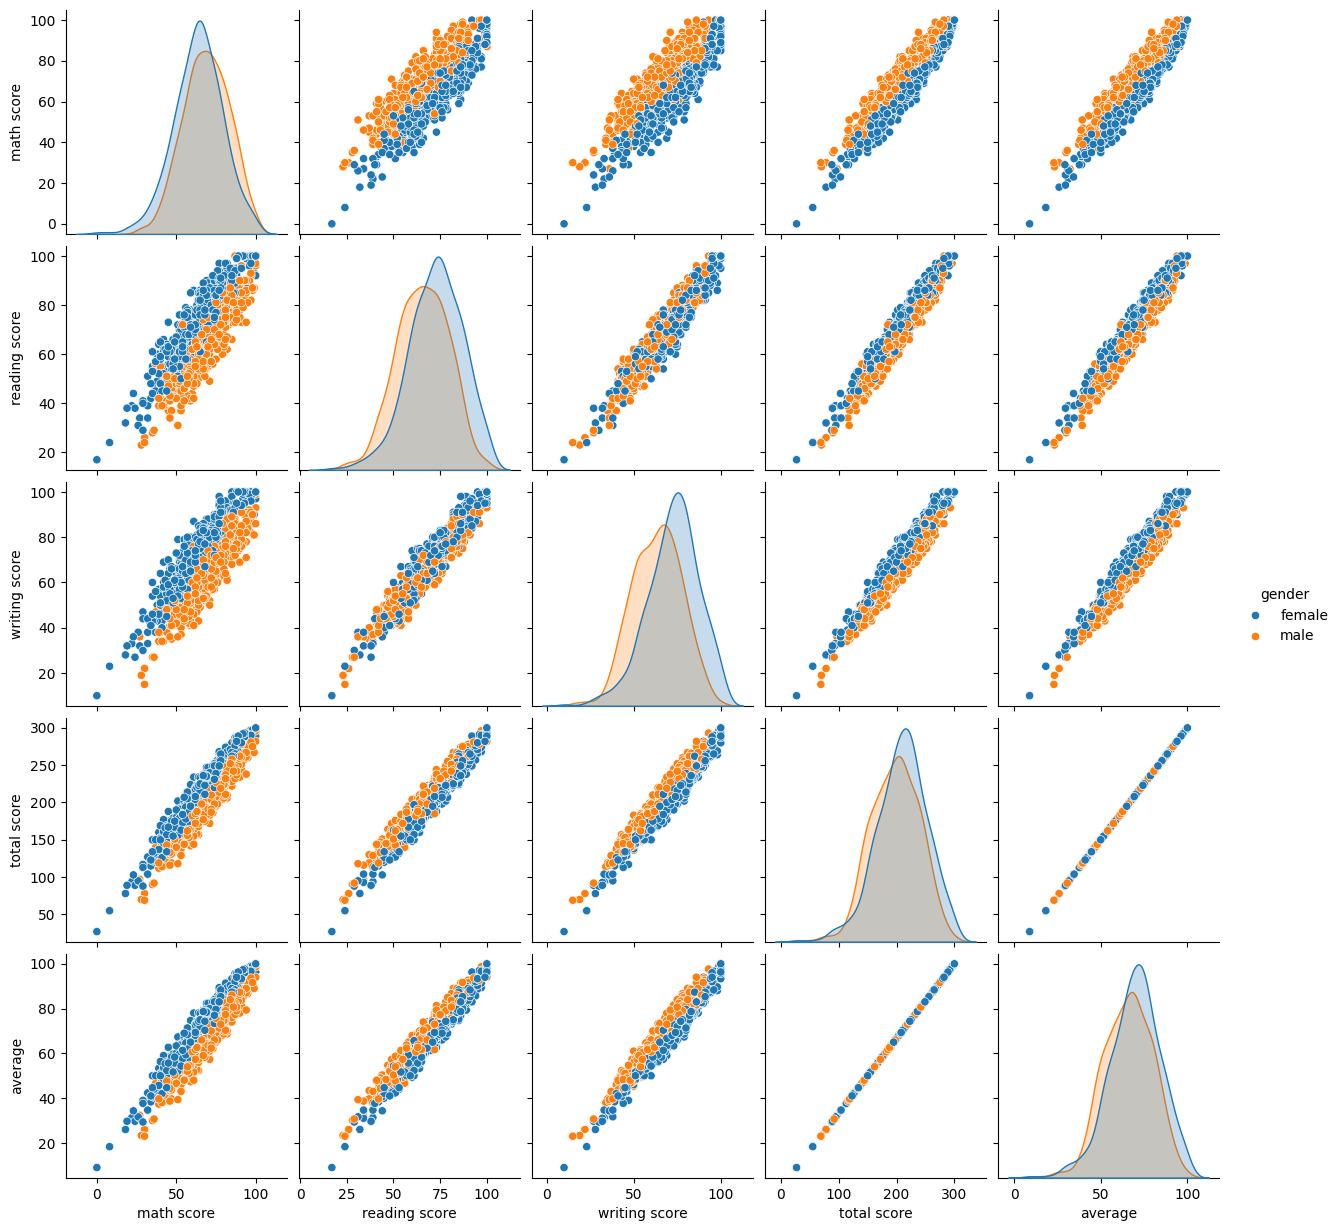

In [34]:
sns.pairplot(df,hue = 'gender')
plt.show()